# Lesson 6: Marine heatwaves and climate change


In [134]:
# Load required modules.
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
from datetime import date, timedelta
from matplotlib import pyplot as plt

%matplotlib inline

### Enter the latitude and longitude of the data that you downloaded from the MHW tracker website:

In [2]:
lat = 34.125
lon = -119.875

### Enter the path where you saved the MHW tracker climatology and statistics .csv files:

In [3]:
# Only use forward slashes!
data_path = 'C:/Users/astel/Documents/GitHub/SciX_Marine_Heatwaves/data/'

Load the MHW tracker climatology and statistics .csv files

In [253]:
clim = pd.read_csv(data_path + 'clim_lon_{}_lat_{}.csv'.format(lon, lat))
mhws = pd.read_csv(data_path + 'event_lon_{}_lat_{}.csv'.format(lon, lat), parse_dates=[3, 4, 5, 6])

### Convert the pandas dataframe to an xarray dataset (makes things easier for us in this form).

In [255]:
# Creating a new pandas dataframe where the first column is now 'date_start'.
mhw = mhws.reset_index(level=0, drop=True)
mhw = mhws.set_index('date_start')
mhw.head()

# Converting to xarray.
mhw = mhws.to_xarray()
mhw['duration'] = mhw.duration.astype(dtype=int) # For some reason the duration wasn't loaded as numbers, so fixing that.

# Changing the coordinate to date_start (keeping the name 'index')
# This way, all MHWs are sorted into the year that they started (similar to Oliver at al. 2018)
mhw['index'] = mhw.date_start
print(mhw)

<xarray.Dataset>
Dimensions:               (index: 81)
Coordinates:
  * index                 (index) datetime64[ns] 1982-09-11 ... 2019-09-12
Data variables:
    lon                   (index) float64 -119.9 -119.9 -119.9 ... -119.9 -119.9
    lat                   (index) float64 34.12 34.12 34.12 ... 34.12 34.12
    event_no              (index) int64 1 2 3 4 5 6 7 8 ... 75 76 77 78 79 80 81
    date_start            (index) datetime64[ns] 1982-09-11 ... 2019-09-12
    date_peak             (index) datetime64[ns] 1982-09-11 ... 2019-09-13
    date_end              (index) datetime64[ns] 1982-09-15 ... 2019-09-16
    duration              (index) int32 5 5 6 51 6 6 18 65 ... 24 12 31 7 7 5 5
    intensity_mean        (index) float64 2.106 1.502 1.608 ... 1.443 2.27 2.668
    intensity_max         (index) float64 2.25 1.71 1.71 2.59 ... 1.65 2.42 3.42
    intensity_cumulative  (index) float64 10.53 7.51 9.65 ... 10.1 11.35 13.34


# Annual mean MHW duration

Text(0,0.5,'Annual Mean Duration [days]')

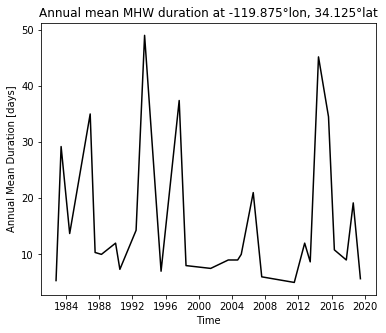

In [247]:
plt.figure(figsize=(6, 5))
plt.title('Annual mean MHW duration at {}°lon, {}°lat'.format(lon, lat))

# Grouping MHWs by the year that they started and plotting the annual mean duration.
plt.plot(mhw.date_start.groupby('index.year').mean(), 
         mhw.duration.groupby('index.year').mean(), color='black')
plt.xlabel('Time')
plt.ylabel('Annual mean duration [days]')
# plt.savefig('MHW_duration_lon_{}_lat_{}.png'.format(lon, lat))

In [216]:
stats.pearsonr(mhw.index.groupby('index.year').mean().year, mhw.duration.groupby('index.year').mean())

(-0.061367029142908903, 0.7564002030662959)

We will split the timeseries into two seperate time slices that are 15 years long. For this, you need to manually find the dates where the first and last MHW occured in the 15 year time slice. You can change the time slice lenght (e.g. 10 years instead of 15 to dee if it makes any noteable difference to your result.

To do this, look at mhw.date_start to find the dates.

In [257]:
mhw.date_start

<xarray.DataArray 'date_start' (index: 81)>
array(['1982-09-11T00:00:00.000000000', '1982-10-20T00:00:00.000000000',
       '1982-11-16T00:00:00.000000000', '1983-01-12T00:00:00.000000000',
       '1983-03-08T00:00:00.000000000', '1983-06-26T00:00:00.000000000',
       '1983-08-07T00:00:00.000000000', '1983-09-17T00:00:00.000000000',
       '1984-02-03T00:00:00.000000000', '1984-03-10T00:00:00.000000000',
       '1984-05-20T00:00:00.000000000', '1984-06-24T00:00:00.000000000',
       '1984-07-16T00:00:00.000000000', '1984-08-15T00:00:00.000000000',
       '1984-09-26T00:00:00.000000000', '1986-11-27T00:00:00.000000000',
       '1987-04-24T00:00:00.000000000', '1987-05-16T00:00:00.000000000',
       '1987-10-26T00:00:00.000000000', '1988-04-05T00:00:00.000000000',
       '1989-12-19T00:00:00.000000000', '1990-04-20T00:00:00.000000000',
       '1990-05-04T00:00:00.000000000', '1990-10-24T00:00:00.000000000',
       '1992-02-25T00:00:00.000000000', '1992-03-08T00:00:00.000000000',
       

In [256]:
mhw1 = mhw.sel(index=slice('1982-09-11', '1997-10-17')).duration.groupby('index.year').mean()
mhw2 = mhw.sel(index=slice('2004-09-06', '2019-09-12')).duration.groupby('index.year').mean()

In [258]:
print(stats.ttest_ind(mhw1, mhw2))

Ttest_indResult(statistic=0.7754222434054755, pvalue=0.4459902739113146)


# Mean intensity of MHWs (annual mean)

Text(0,0.5,'Annual mean intensity [°C]')

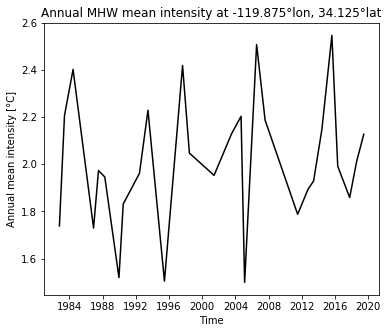

In [249]:
plt.figure(figsize=(6, 5))
plt.title('Annual MHW mean intensity at {}°lon, {}°lat'.format(lon, lat))
plt.plot(mhw.date_start.groupby('index.year').mean(), 
         mhw.intensity_mean.groupby('index.year').mean(), color='black')
plt.xlabel('Time')
plt.ylabel('Annual mean intensity [°C]')
# plt.savefig('MHW_intensity_mean_lon_{}_lat_{}.png'.format(lon, lat))

In [221]:
stats.pearsonr(mhw.index.groupby('index.year').mean().year, mhw.intensity_mean.groupby('index.year').mean())

(0.16370243785110128, 0.40519712336417024)

In [259]:
mhw1 = mhw.sel(index=slice('1982-09-11', '1997-10-17')).intensity_mean.groupby('index.year').mean()
mhw2 = mhw.sel(index=slice('2004-09-06', '2019-09-12')).intensity_mean.groupby('index.year').mean()
print(stats.ttest_ind(mhw1, mhw2))

Ttest_indResult(statistic=-0.8253577204368272, pvalue=0.41764743176738195)


# Max intensity of MHWs (annual mean)

Text(0,0.5,'Annual mean max intensity [°C]')

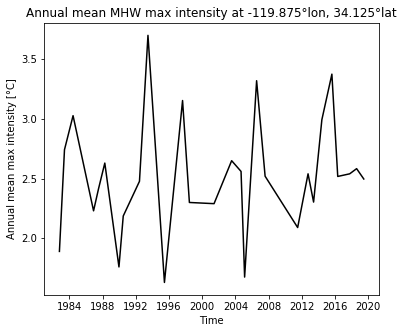

In [250]:
plt.figure(figsize=(6, 5))
plt.title('Annual mean MHW max intensity at {}°lon, {}°lat'.format(lon, lat))
plt.plot(mhw.date_start.groupby('index.year').mean(), 
         mhw.intensity_max.groupby('index.year').mean(), color='black')
plt.xlabel('Time')
plt.ylabel('Annual mean max intensity [°C]')
# plt.savefig('MHW_intensity_max_lon_{}_lat_{}.png'.format(lon, lat))

In [260]:
mhw1 = mhw.sel(index=slice('1982-09-11', '1997-10-17')).intensity_max.groupby('index.year').mean()
mhw2 = mhw.sel(index=slice('2004-09-06', '2019-09-12')).intensity_max.groupby('index.year').mean()
print(stats.ttest_ind(mhw1, mhw2))

Ttest_indResult(statistic=-0.42672192912087786, pvalue=0.6735496263101268)
